In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
# kmeans
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [4]:
filename = "../out.csv"

# df = pd.read_csv(filename, sep=",").drop(columns=["Unnamed: 0"])
df = pd.read_csv(filename, sep=",").drop(columns=["id"])

In [5]:
# df.head()

(1, 'done')
(2, 'done')
(3, 'done')
(4, 'done')
(5, 'done')
(6, 'done')
(7, 'done')
(8, 'done')
(9, 'done')


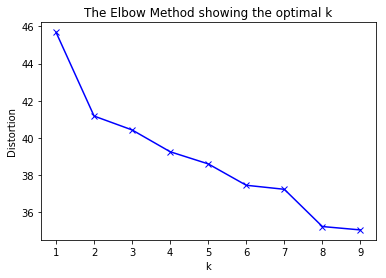

In [81]:
# SELECT K FOR KMEANS
distortions = []
K = range(1,10,1)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df.values[:-1])
    kmeanModel.fit(df.values[:-1])
    distortions.append(sum(np.min(cdist(df.values[:-1], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.values[:-1].shape[0])
    print(k, "done")
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [6]:
# KMeans

In [82]:
kmeans = KMeans(n_clusters=3)

In [83]:
kmeans.fit(df.values[:-1])
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [84]:
labels

array([0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 0], dtype=int32)

In [85]:
# PCA 

In [86]:
pca    = PCA()
data   = pca.fit_transform(df.values)
p_comp = pca.explained_variance_ratio_

In [87]:
centers_plot = pca.transform(centers)

In [88]:
colors = {1: "r", 2: "b", 3: "c", 4: "g", 5: "k"}

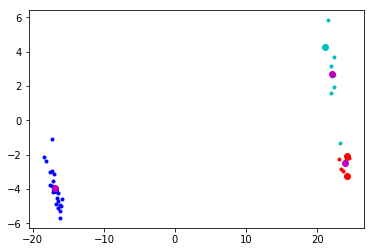

In [89]:
plt.figure()

for i, label in enumerate(labels): 
    if i > 34:
        plt.plot(data[i, 0], data[i, 1], colors[label+1]+"o")
    else:
        plt.plot(data[i, 0], data[i, 1], colors[label+1]+".")
    
plt.plot(centers_plot[:, 0], centers_plot[:, 1], "mo")
plt.show()

In [22]:
list(pca.explained_variance_ratio_)

[0.17531193588676106,
 0.082019032676623471,
 0.027622243802669224,
 0.025395996593081258,
 0.022826570179003528,
 0.022632740666534108,
 0.022180119642202737,
 0.021897565878460413,
 0.021655647485432715,
 0.021558779340491305,
 0.021323817408242001,
 0.021181389726982493,
 0.020953948529919615,
 0.020948090850432786,
 0.020773894787715196,
 0.020509995679592649,
 0.020453947894842148,
 0.020142374628902261,
 0.020090870692238513,
 0.019919924702894984,
 0.019460180674210292,
 0.019386679729559125,
 0.019340435367451468,
 0.019212612867956155,
 0.019169974396684251,
 0.01908993793224396,
 0.018807125447942961,
 0.0187582326653799,
 0.018678478946772901,
 0.018500232232861069,
 0.018424874191324239,
 0.018236386132287896,
 0.018110455806050363,
 0.017941545505146338,
 0.017753264443305765,
 0.017711891284446019,
 0.017564601683900151,
 0.01727177757445416,
 0.017182426065000568,
 1.0452477900748941e-28]